<a href="https://colab.research.google.com/github/dataqueenpend/Case-Studies/blob/main/Case_Study_School_Budgeting_with_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: School Budgeting with Machine Learning in Python

 You'll explore a problem related to school district budgeting. By building a model to automatically classify items in a school's budget, it makes it easier and faster for schools to compare their spending with other schools.

 *You'll begin by building a baseline model that is a simple, first-pass approach. In particular, you'll do some natural language processing to prepare the budgets for modeling. 
 
 * Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. 
 
 * Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.

 Case study with DataCamp. Performed by myself.

##Exploring the raw data

*How can we accurately classify line-items in a school budget based on what that money is being used for?* 

We will explore the raw text and numeric values in the dataset, both quantitatively and visually. And we'll learn how to measure success when trying to predict class labels for each row of the dataset.


> **bring the power of data science to social impact organizations**

* running online data science challenges for non-profits, NGOs, and social enterprises.

*What we'll be brainstorming on here?*

We'll work through one of these competitions as a case-study, and we'll show you how the winner achieved the best score. 

* do some natural language processing, 
* some feature engineering, 
* and boost computational efficiency. 

*In addition to these pro-tips, we'll look at one of the ways in which we can use data to have a social impact.*

Let's see what's in the challenge!

> School budgets in the United States are incredibly complex, and there are no standards for reporting how money is spent. 

* Schools want to be able to measure their performance
  * for example, are we spending more on textbooks than our neighboring schools, and is that investment worthwhile?

to do this comparison takes **hundreds of hours each year** in which analysts hand-categorize each line-item.

*Our goal is to build a machine learning algorithm that can automate that process.*

* For each line item, we have some text fields that tell us about the expense--
  * for example, a line might say something like "Algebra books for 8th grade students". We also have the amount of the expense in dollars. 

*  This line item then has a set of labels attached to it. 
  * For example, this one might have labels like "Textbooks," "Math," and "Middle School." These labels are our target variable 

> This is a **supervised learning problem** where we want to use correctly labeled data to build an algorithm that can suggest labels for unlabeled lines. 

 This is in contrast to an unsupervised learning problem where we don't have labels, and we are using an algorithm to automatically which line-items might go together.


* we have over 100 unique target variables that could be attached to a single line item.
  * we want to predict a category for each line item, this is a **classification problem**.

This is as opposed to a regression problem where we want to predict a numeric value for a line item--for example, predicting house prices. 


*Here are some of the actual categories that we need to determine:*
* Is this expense for pre-kindergarten education (which is important because it has different funding sources)? 
* Is there a particular Student_Type that this expense supports?




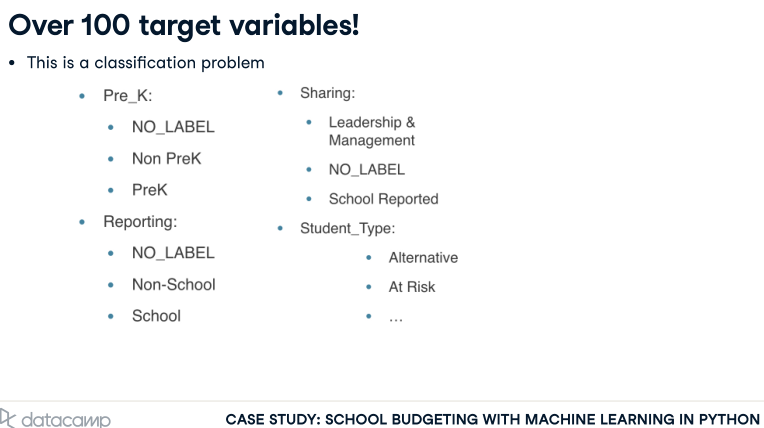



 there are **9 columns** with many different possible categories in each column.

**How we can help?**

> If you talk to the people who actually do this work, it is **impossible for a human to label these line items with 100% accuracy**.

 To take this into account, we don't want our algorithm to just say "This line is for textbooks." **We want the algorithm to say: "It's most likely this line is for textbooks, and I'm 60% sure that it is. If it's not textbooks, I'm 30% sure it's 'office supplies.'"** By making these suggestions, analysts can prioritize their time. This is called a **human-in-the-loop machine learning system**.

 * We will predict a probability between 0 (the algorithm thinks this label is very unlikely for this line item) and 1 (the algorithm thinks this label is very likely).

 ###Exploring the data

 If we are predicting probabilities, **we need a value for each possible value in each column**. 
  * In this case, the target would have the columns for each hair type and for each eye color. 

  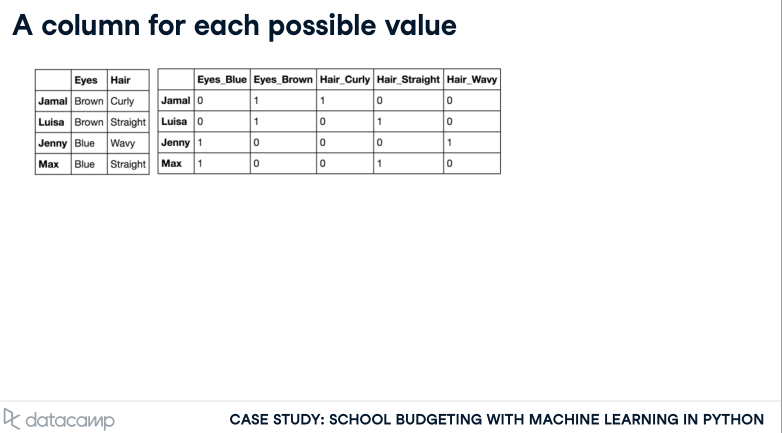

**Loading the data**

We'll use pandas to load the data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

(for this case study - DataCamp didn't share the dataset - because of that, we'll unfortunately we'll be doing all the code only in "sample mode")



In [ ]:
df = pd.read_csv('TrainingData.csv', index_col=0)

df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
Facility_or_Department    252 non-null object
Position_Extra            1026 non-null object
Total                     1542 non-null float64
Program_Description       1192 non-null object
Fund_Description          819 non-null object
Text_1                    1132 non-null object
dtypes: float64(2), object(23)
memory usage: 356.9+ KB

In [5]:
df.head()
Out[5]:

                    Function          Use          Sharing   Reporting Student_Type Position_Type               Object_Type     Pre_K   Operating_Status  ... Location_Description  FTE                  Function_Description      Facility_or_Department Position_Extra     Total                                Program_Description                                   Fund_Description                Text_1
198                 NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN  Care and Upkeep of Building Services                         NaN            NaN  -8291.86                                                NaN  Title I - Disadvantaged Children/Targeted Assi...    TITLE I CARRYOVER 
209   Student Transportation     NO_LABEL  Shared Services  Non-School     NO_LABEL      NO_LABEL    Other Non-Compensation  NO_LABEL  PreK-12 Operating  ...      ADMIN. SERVICES  NaN             STUDENT TRANSPORT SERVICE                         NaN            NaN    618.29                               PUPIL TRANSPORTATION                                       General Fund                   NaN
750     Teacher Compensation  Instruction  School Reported      School  Unspecified       Teacher  Base Salary/Compensation  Non PreK  PreK-12 Operating  ...                  NaN  1.0                                   NaN                         NaN        TEACHER  49768.82                              Instruction - Regular                             General Purpose School                   NaN
931                 NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN                           Instruction  Instruction And Curriculum            NaN     -1.02  "Title I, Part A Schoolwide Activities Related...                             General Operating Fund                   NaN
1524                NO_LABEL     NO_LABEL         NO_LABEL    NO_LABEL     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL      Non-Operating  ...                  NaN  NaN            Other Community Services *                         NaN            NaN   2304.43                                                NaN  Title I - Disadvantaged Children/Targeted Assi...   TITLE I PI+HOMELESS

[5 rows x 25 columns]


In [6]:
df.tail()
Out[6]:

                        Function          Use                  Sharing   Reporting       Student_Type Position_Type                 Object_Type     Pre_K   Operating_Status  ...  Location_Description  FTE                   Function_Description Facility_or_Department               Position_Extra       Total            Program_Description                Fund_Description                         Text_1
344986   Substitute Compensation  Instruction          School Reported      School        Unspecified    Substitute                    Benefits  NO_LABEL  PreK-12 Operating  ...                   NaN  NaN                UNALLOC BUDGETS/SCHOOLS                    NaN   PROFESSIONAL-INSTRUCTIONAL    27.04000  GENERAL HIGH SCHOOL EDUCATION                             NaN            REGULAR INSTRUCTION
384803                  NO_LABEL     NO_LABEL                 NO_LABEL    NO_LABEL           NO_LABEL      NO_LABEL                    NO_LABEL  NO_LABEL      Non-Operating  ...  PERSONNEL-PAID LEAVE  NaN                            NON-PROJECT                    NaN   PROFESSIONAL-INSTRUCTIONAL         NaN                 STAFF SERVICES                             NaN                        CENTRAL
224382   Substitute Compensation  Instruction          School Reported      School  Special Education    Substitute     Substitute Compensation  NO_LABEL  PreK-12 Operating  ...               School   0.0         EXCEPTIONAL                                       NaN                          NaN   200.39000                            NaN  GENERAL FUND                                              NaN
305347  Facilities & Maintenance          O&M  Leadership & Management  Non-School             Gifted     Custodian  Other Compensation/Stipend  Non PreK  PreK-12 Operating  ...           Unallocated  NaN  Facilities Maintenance And Operations    Gifted And Talented  ANY CUS WHO IS NOT A SUPER      5.29000            Gifted And Talented          General Operating Fund  ADDL REGULAR PAY-NOT SMOOTHED
101861      Teacher Compensation  Instruction          School Reported      School            Poverty       Teacher    Base Salary/Compensation  NO_LABEL  PreK-12 Operating  ...                   NaN  NaN                                TITLE I                    NaN   PROFESSIONAL-INSTRUCTIONAL  1575.03504   GENERAL ELEMENTARY EDUCATION                             NaN            REGULAR INSTRUCTION

[5 rows x 25 columns]

Some of the column names correspond to features - descriptions of the budget items - such as the Job_Title_Description column. *The values in this column tell us if a budget item is for a teacher, custodian, or other employee.*

Some columns correspond to the budget **item labels we will be trying to predict with our model**. 
  * For example, the Object_Type column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.


**Summarizing the data**

We'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. 

there are two numeric columns, called FTE and Total.

* ```FTE```: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
* ```Total```: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.


In [ ]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

In [ ]:
<script.py> output:
                  FTE         Total
    count  449.000000  1.542000e+03
    mean     0.493532  1.446867e+04
    std      0.452844  7.916752e+04
    min     -0.002369 -1.044084e+06
    25%      0.004310  1.108111e+02
    50%      0.440000  7.060299e+02
    75%      1.000000  5.347760e+03
    max      1.047222  1.367500e+06

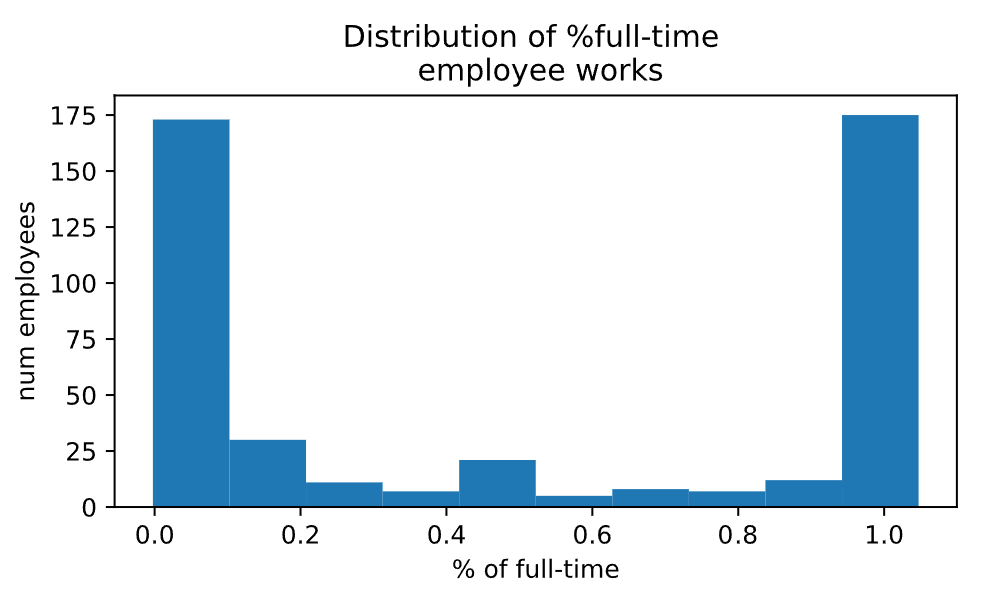

> The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.


###Looking at the datatypes



##Creating a simple first model

We'll use numeric data only to train the model. Remember to split the data!

*  how to format the predictions. 
* introduction to natural language processing (NLP) in order to start working with the large amounts of text in the data.



##Improving model performance

*How to improve on benchmark model using pipelines?*

 Because the budget consists of both text and numeric data, we'll be building pipielines that process multiple types of data. 
 
 * how the flexibility of the pipeline workflow makes testing different approaches efficient, even in complicated problems like this one!

##Tips for winning the competitions